In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


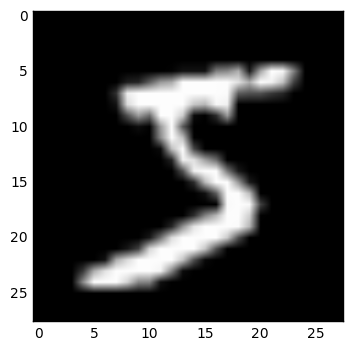

In [10]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [85]:
tf.reset_default_graph()

In [86]:
def dense(x, n1, n2, name):
    with tf.variable_scope(name, reuse=None):
        W = tf.get_variable("weights", shape=[n1,n2],
                           initializer = tf.random_normal_initializer(mean=0., stddev=0.01))
        b = tf.get_variable("bias", shape=[n2], initializer=tf.constant_initializer(0.))
        out = tf.matmul(x, W) + b
        return out

In [87]:
def encoder(x):
    with tf.name_scope('Encoder'):
        e_dense_1 = tf.nn.relu(dense(x, input_dim, n_l1, 'e_dense_1'))
        e_dense_2 = tf.nn.relu(dense(e_dense_1, n_l1, n_l2, 'e_dense_2'))
        latent_var = dense(e_dense_2, n_l2, z_dim, 'e_latent_var')
        return latent_var        

In [88]:
def decoder(x):
    with tf.name_scope('Decoder'):
        d_dense_1 = tf.nn.relu(dense(x, z_dim, n_l2, 'd_dense_1'))
        d_dense_2 = tf.nn.relu(dense(d_dense_1, n_l2, n_l1, 'd_dense_2'))
        output = tf.nn.sigmoid(dense(d_dense_2, n_l1, input_dim, 'd_out'))
        return output

In [89]:
input_dim = 784
n_l1 = 1000
n_l2 = 1000
z_dim = 2
batch_size = 1024

lr = 1e-3

In [90]:
x_input = tf.placeholder(dtype = tf.float32, shape = [None, input_dim])
x_target = tf.placeholder(dtype=tf.float32, shape = [None, input_dim])
decoder_input = tf.placeholder(dtype=tf.float32, shape=[None,z_dim])
encoder_output = encoder(x_input)
decoder_output = decoder(encoder_output)

In [91]:
diff = x_target - decoder_output
loss = tf.reduce_mean(tf.square(diff))

In [92]:
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

In [94]:
sess = tf.Session()

In [95]:
sess.run(tf.global_variables_initializer())
for i in tqdm(range(100)):
    permutations = list(np.random.permutation(60000))
    num_batches = int(np.floor((60000-1)/batch_size))
    for k in range(0, num_batches+1):
        indexes = permutations[k*batch_size:(k+1)*batch_size]
        mb_X= np.vstack([X_train[i].reshape(-1,)/255 for i in indexes])
        sess.run(train, feed_dict = {x_input:mb_X, x_target : mb_X})


  0%|          | 0/100 [00:00<?, ?it/s]
Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/arsenior/Software/anaconda3/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/arsenior/Software/anaconda3/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/arsenior/Software/anaconda3/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 100/100 [44:15<00:00, 26.55s/it]


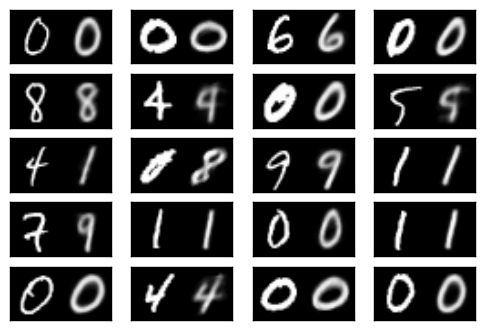

In [104]:
_, ax = plt.subplots(5, 4)
indexes = np.random.choice(60000,20,replace=False)
mb_X= np.vstack([X_train[i].reshape(-1,)/255 for i in indexes])
gen_output = sess.run(decoder_output, feed_dict = {x_input:mb_X})
for i in range(20):
    img = np.hstack((X_train[indexes[i]],gen_output[i].reshape(28,28)*255))
    ax[i//4,i%4].imshow(img, cmap='gray')
    ax[i//4,i%4].set_xticks([])
    ax[i//4,i%4].set_yticks([])
    ax[i//4,i%4].set_aspect('auto')
plt.show()

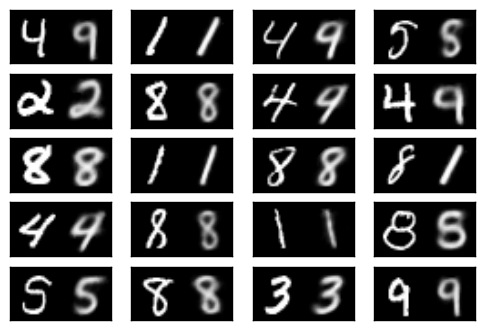

In [107]:
_, ax = plt.subplots(5, 4)
indexes = np.random.choice(10000,20,replace=False)
mb_X= np.vstack([X_test[i].reshape(-1,)/255 for i in indexes])
gen_output = sess.run(decoder_output, feed_dict = {x_input:mb_X})
for i in range(20):
    img = np.hstack((X_test[indexes[i]],gen_output[i].reshape(28,28)*255))
    ax[i//4,i%4].imshow(img, cmap='gray')
    ax[i//4,i%4].set_xticks([])
    ax[i//4,i%4].set_yticks([])
    ax[i//4,i%4].set_aspect('auto')
plt.show()